<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 - Tipología y ciclo de vida de los datos aula 1 · Práctica 1</p>
<p style="margin: 0; text-align:right;">2018 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right;">Prof. Colaboradora: <b>Mireia Calvo Gonzalez</b></p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Alumno: <b>Fernando Antonio Barbeiro Campos</b> - <a href="">fbarbeiro@uoc.edu</a></p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>
<center><h1>Práctica 2 - Limpieza y validación de los datos</h1></center>


# Contenidos

1. [Dataset](#data1)

2. [Integración y selección de los datos de interés a analizar.](#data2)

3. [Limpieza de los datos.](#data3)
    
    3.1. [¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?](#data31)
    
    3.2. [Identificación y tratamiento de valores extremos.](#data32)
    
    
4. [Análisis de los datos.](#data4)

    4.1. [Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).](#data41)
    
    4.2. [Comprobación de la normalidad y homogeneidad de la varianza.](#data42)
    
    4.3. [Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc.](#data43)
    
    
5. [Representación de los resultados a partir de tablas y gráficas.](#data5)

6. [Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?](#data6)

7. [Código](#data7)

8. [Referencias](#refer)

## 1. Dataset <a name="data1"></a>
*Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder?*

He elegido el dataset ["**Titanic: Machine Learning from Disaster**" de Kagle](https://www.kaggle.com/c/titanic/overview). 
<img src="titanic.jpg" alt="Titanic" style="width: 700px;"/>
<center>Figura 1: Titanic</center>
<p></p>
La información presente en el dataset són datos sobre cada pasajero del famoso naufragio, si la persona sobrevivió o no, su sexo, tipo de cabina que estaba, entre otros.

Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

Justamente, el problema que buscamos a contestar es precisamente esto: hacer el análisis de **¿qué tipos de personas podrían sobrevivir?**


Aún hablando un poco sobre el dataset, vamos a mirar un poco más de información sobre el mismo:

In [1]:
# Objetivo: Asegurar que estamos trabajando con el formato en ingles separado por comas
L <- readLines("train.csv", n = 1)
if (grepl(",", L)) print("File has an English format")

[1] "File has an English format"


In [2]:
# Como estamos trabajando con ficheros separados por commas, vamos a mirar un poco de datos
df <- read.csv("train.csv")
head(df)

# Mirando los nombres de columnas del dataframe y los tipos de variables y informacion adicional
print(paste("We are evaluating", nrow(df), "rows of code"))
print("Column's names: ")
colnames(df)
sapply(df,class)
str(df)
summary(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


[1] "We are evaluating 891 rows of code"
[1] "Column's names: "


[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

PassengerId    Survived      Pclass        Name         Sex         Age 
  "integer"   "integer"   "integer"    "factor"    "factor"   "numeric" 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
  "integer"   "integer"    "factor"   "numeric"    "factor"    "factor"

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

## 2. Integración y selección de los datos de interés a analizar<a name="data2"></a>


Dando un poco más de contexto en la selección de variables: debemos escoger un grupo de variables originales (también llamadas características o atributos desde el mundo del machine learning) que contenga la mayor parte de la información relevante para resolver el problema a tratar. Existen muchas metodologías y es un campo de investigación muy importante [1] *(Stanczyk y Jain, 2014)*.

Dado el contexto, queda claro que podemos aquí reducir un poco la dimensionalidad en el ámbito de atributos (columnas) porque hay variables en las cuales detectamos que no aportan mucho para el tipo de conocimiento que necesitamos recolectar. Por ejemplo:
 - el número del **Ticket** de cada persona es bastante irrelevante para extraer un modelo y predecir si la persona ha sobrevivido o no
 - **Embarked** - el puerto donde ha embarcado una persona en el navio tampoco
 - **Cabin** - hay inumeros registros en la columna que no estan rellenados
 
Ahora que tenemos un poco más de información sobre el dataset, con el intuito de obtener un modelo significativo, he elegido los siguientes atributos para el análisis:
- *Survived*
- *Pclass*
- *Name*
- *Sex*
- *Age*
- *Fare*

Queda claro que el atributo **Name** tampoco es relevante, pero mantuve por si acaso necesito explicar o hacer alguna comparación de pasajeros (será más sencillo identificar las personas por sus nombres). 


Definidos los atributos, antes de seguir para el próximo ejercicio, hago la selección de los datos que vamos a trabajar abajo.

In [3]:
keeps <- c("Survived", "Pclass", "Name", "Sex", "Age", "Fare")
df <- df[keeps] 
head(df)

Survived,Pclass,Name,Sex,Age,Fare
0,3,"Braund, Mr. Owen Harris",male,22,7.2500
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,71.2833
1,3,"Heikkinen, Miss. Laina",female,26,7.9250
1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,53.1000
0,3,"Allen, Mr. William Henry",male,35,8.0500
0,3,"Moran, Mr. James",male,NA,8.4583


## 3. Limpieza de los datos<a name="data3"></a>

### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?<a name="data31"></a>

In [4]:
# Como resultado del comando abajo, podemos ver que solamente Age tiene elementos NA
print("Columnas con NAs:")
unlist(lapply(df, function(x) any(is.na(x))))

print("Cantidad de columnas con NAs:")
sapply(df, function(x) sum(is.na(x)))

# Abajo comentaré las aproximaciones posibles para el escenario y la adoptada              
df_no_NA <- df[rowSums(is.na(df)) == 0,]
nrow(df_no_NA)
options(warn=-1)             
for(i in 1:ncol(df)){
  # Aquí estamos calculando un promedio basado en la información de las otras filas para los casos donde hay elemento vacío
  df[is.na(df[,i]), i] <- mean(df[,i], na.rm = TRUE)
}
options(warn=0)  
       
print("Aplicando un promedio para los atributos vacios, ahora no hay más NAs:")
unlist(lapply(df, function(x) any(is.na(x))))
nrow(df)

[1] "Columnas con NAs:"


Survived   Pclass     Name      Sex      Age     Fare 
   FALSE    FALSE    FALSE    FALSE     TRUE    FALSE

[1] "Cantidad de columnas con NAs:"


Survived   Pclass     Name      Sex      Age     Fare 
       0        0        0        0      177        0

[1] 714

[1] "Aplicando un promedio para los atributos vacios, ahora no hay más NAs:"


Survived   Pclass     Name      Sex      Age     Fare 
   FALSE    FALSE    FALSE    FALSE    FALSE    FALSE

[1] 891

Como podemos notar, solamente la columna **Age** presentaba **datos vacíos**. Además, la cantidad de registros que estamos trabajando tampoco es masiva, es decir, **tenemos un muestreo pequeño de datos (891 registros)**.

Esto básicamente motiva con que no adoptaramos una aproximación posible en los casos de datos vacíos (NA):

- **Eliminación de registros (filas) donde haya a ocurrencia de NAs**

Como podemos ver en el dataset `df_no_NA`, quedamos simplemente con `714` filas para trabajar (particularmente he considerado poco), por lo tanto, **he adoptado una aproximación distinta**:
<p style="color: red">
<ul>
    <li><b style="color: red">Calcular un promedio basado en la información de las otras filas para los casos donde hubiera un elemento vacío</b>
    </li>
</ul>
</p>

Finalmente había un registro NA en la última línea del comando `head(df)` (*Moran, Mr. James*) veamos como ha quedado los datos de Age ahora:

In [5]:
head(df)

Survived,Pclass,Name,Sex,Age,Fare
0,3,"Braund, Mr. Owen Harris",male,22.00000,7.2500
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,71.2833
1,3,"Heikkinen, Miss. Laina",female,26.00000,7.9250
1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,53.1000
0,3,"Allen, Mr. William Henry",male,35.00000,8.0500
0,3,"Moran, Mr. James",male,29.69912,8.4583


Por lo tanto, los valores vacios en Edad están ahora calculados con base en la media.

Para cerrar el tema de los *Missing Values*, hay otras aproximaciones que no parecían adecuadas para el escenario, sin embargo añado para dejar claro que las he tenido en cuenta:

- **Rellenar manualmente los valores que faltan**
- **Rellenar con una constante global**
- **Rellenar con un valor más probable (podría ser echo con una regresión, por ejemplo)**

Finalmente, he explicado porque no he utilizado la estrategia de eliminar los campos (por el muestreo es demasiado pequeño). Voy a explicar brevemente porque no he adoptado ninguna de las tres estrategias mencionadas arriba:
1. Rellenar los valores manualmente es un trabajo repetitivo y tedioso (hay más de 100 registros sin valores).
2. Utilizar una constante global con un valor cualquiera es lo basicamente la misma aproximación que hice, con la diferencia de que usando la media estamos aplicando una medida un poco más factible que simplemente adivinar un valor constante.
3. La opción de un valor más probable es interesante, pero exige la utilización de un algoritmo como KNN o algo del genero, siendo así una aproximación de más liosa teniendo en cuenta que los objetivos del ejercicio son más sencillos - si fuera una situación que queremos obtener muchisima precisión en el análisis, seguramente podría ser adoptada.

Con esto, queda claro que la adopción de media como valores vacios atende el *trade-off* de sencillez en su implementación y añade algunas características interesantes como la utilización de alguna medida calculada del propio dataset.

### 3.2. Identificación y tratamiento de valores extremos<a name="data32"></a>

La verdad es que, mismo antes de seguir con el análisis si hay o no valores extremos (*outliers*) queda evidente que hay pocas posibilidades de haber muchos problemas, dado que tenemos simplemente 2 columnas con valores propiamente numéricos. Eso porque aunque **Survived** y **Pclass** son *numeric*, toman valores finitos, por lo que no pueden considerarse variables contínuas y deben factorizarse - abajo lo hacemos antes de empezar la identificación de extremos.

**Los outliers afectan especialmente a la media (medida poco robusta). Y cuando la muestra es pequeña como en nuestro, el efecto se nota aún más acentuado.**

In [6]:
sapply(df,class)

Survived    Pclass      Name       Sex       Age      Fare 
"numeric" "numeric"  "factor"  "factor" "numeric" "numeric"

In [7]:
df$Survived <- as.factor(ifelse(df$Survived == 1, "Yes", "No"))
df$Pclass <- as.factor(df$Pclass)

[1]   0.0000   7.9104  14.4542  31.0000 512.3292

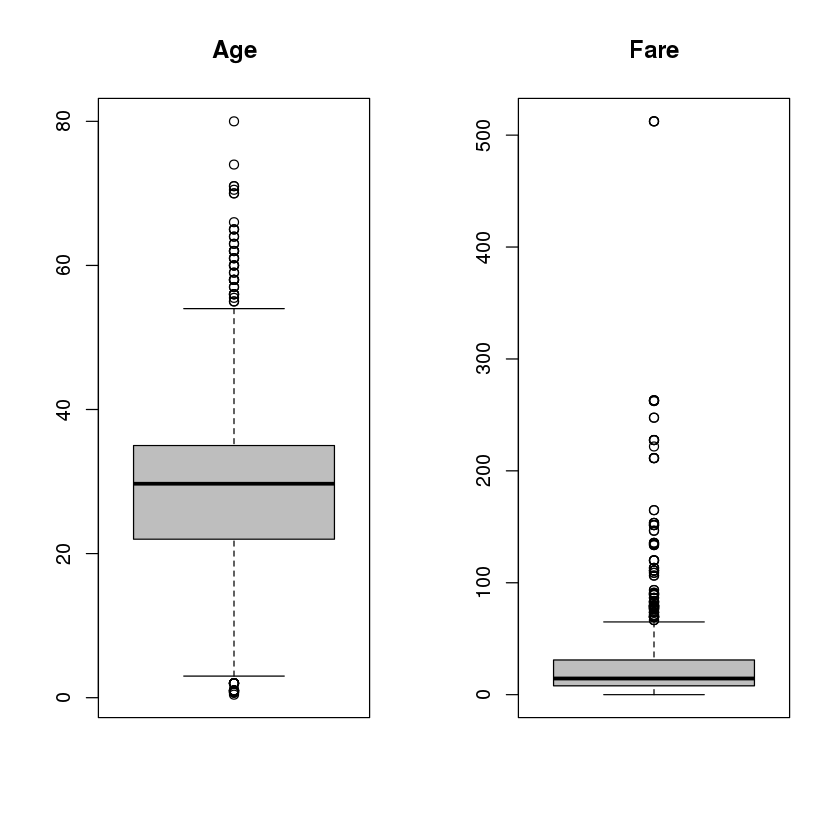

In [8]:
checkingOutliers <- function(df) {
    par(mfrow=c(1,2))
    for(i in 1:ncol(df)) {
        if (is.numeric(df[,i])){
            boxplot(df[,i], main = colnames(df)[i], width = 100, col="gray")
        }
    }

    max(df$Age, na.rm = TRUE)
    min(df$Age, na.rm = TRUE)
    fivenum(df$Age)

    max(df$Fare, na.rm = TRUE)
    min(df$Fare, na.rm = TRUE)
    fivenum(df$Fare)
}
checkingOutliers(df)

In [9]:
#Aqui podemos ver los valores que son outliers
boxplot.stats(df$Fare)$out
boxplot.stats(df$Age)$out

[1]  71.2833 263.0000 146.5208  82.1708  76.7292  80.0000  83.4750  73.5000
  [9] 263.0000  77.2875 247.5208  73.5000  77.2875  79.2000  66.6000  69.5500
 [17]  69.5500 146.5208  69.5500 113.2750  76.2917  90.0000  83.4750  90.0000
 [25]  79.2000  86.5000 512.3292  79.6500 153.4625 135.6333  77.9583  78.8500
 [33]  91.0792 151.5500 247.5208 151.5500 110.8833 108.9000  83.1583 262.3750
 [41] 164.8667 134.5000  69.5500 135.6333 153.4625 133.6500  66.6000 134.5000
 [49] 263.0000  75.2500  69.3000 135.6333  82.1708 211.5000 227.5250  73.5000
 [57] 120.0000 113.2750  90.0000 120.0000 263.0000  81.8583  89.1042  91.0792
 [65]  90.0000  78.2667 151.5500  86.5000 108.9000  93.5000 221.7792 106.4250
 [73]  71.0000 106.4250 110.8833 227.5250  79.6500 110.8833  79.6500  79.2000
 [81]  78.2667 153.4625  77.9583  69.3000  76.7292  73.5000 113.2750 133.6500
 [89]  73.5000 512.3292  76.7292 211.3375 110.8833 227.5250 151.5500 227.5250
 [97] 211.3375 512.3292  78.8500 262.3750  71.0000  86.5000 120.0000  77.9583
[105] 211.3375  79.2000  69.5500 120.0000  93.5000  80.0000  83.1583  69.5500
[113]  89.1042 164.8667  69.5500  83.1583

[1]  2.00 58.00 55.00  2.00 66.00 65.00  0.83 59.00 71.00 70.50  2.00 55.50
[13]  1.00 61.00  1.00 56.00  1.00 58.00  2.00 59.00 62.00 58.00 63.00 65.00
[25]  2.00  0.92 61.00  2.00 60.00  1.00  1.00 64.00 65.00 56.00  0.75  2.00
[37] 63.00 58.00 55.00 71.00  2.00 64.00 62.00 62.00 60.00 61.00 57.00 80.00
[49]  2.00  0.75 56.00 58.00 70.00 60.00 60.00 70.00  0.67 57.00  1.00  0.42
[61]  2.00  1.00 62.00  0.83 74.00 56.00

Considerando que dependendo de cuando se compró el billete para el Titanic los precios pueden tener cambiado bastante, voy a utilizar una tecnica de *Binning* para clasificar el atributo *Fare* en categorías y con ello no tendremos más grande parte de los outliers. Sin embargo, voy a mantener el atributo con el nombre que tiene añadiendo otra columna para la información tratada. Sigue abajo:

In [10]:
df$FareBin <- as.factor(ifelse(df$Fare < 10, "3rd", ifelse(df$Fare < 30, "2nd", "1st")))
sapply(df,class)
tail(df)

Survived    Pclass      Name       Sex       Age      Fare   FareBin 
 "factor"  "factor"  "factor"  "factor" "numeric" "numeric"  "factor"

,Survived,Pclass,Name,Sex,Age,Fare,FareBin
886,No,3,"Rice, Mrs. William (Margaret Norton)",female,39.00000,29.125,2nd
887,No,2,"Montvila, Rev. Juozas",male,27.00000,13.000,2nd
888,Yes,1,"Graham, Miss. Margaret Edith",female,19.00000,30.000,1st
889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.69912,23.450,2nd
890,Yes,1,"Behr, Mr. Karl Howell",male,26.00000,30.000,1st
891,No,3,"Dooley, Mr. Patrick",male,32.00000,7.750,3rd


Con esto, hay simplemente los valores que aparecen en los boxplots como *outliers* en **Age**, y es completamente factible que una persona en el Titanic tuviera `80` años (y también `0.4` años, en el caso de un bebé).


Finalmente, la forma que he utilizado para tratar los atributos de **Age** ha sido la de *Deleting observations* definida por **[2]** *(Sunil, 2016)*.

In [11]:
withoutOutlier <- df[df$Age<55 & df$Age>2, ]
nrow(withoutOutlier)
tail(withoutOutlier)

df <- withoutOutlier

[1] 825

,Survived,Pclass,Name,Sex,Age,Fare,FareBin
886,No,3,"Rice, Mrs. William (Margaret Norton)",female,39.00000,29.125,2nd
887,No,2,"Montvila, Rev. Juozas",male,27.00000,13.000,2nd
888,Yes,1,"Graham, Miss. Margaret Edith",female,19.00000,30.000,1st
889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.69912,23.450,2nd
890,Yes,1,"Behr, Mr. Karl Howell",male,26.00000,30.000,1st
891,No,3,"Dooley, Mr. Patrick",male,32.00000,7.750,3rd


Explicando el enfoque: 

Como en algunas ocasiones, la información tiene un poco de *ruido*, nos interesa reducir al máximo lo mismo y, para ello, una posible solución es discretizar. Así lo hicimos para el atributo **Fare**. Por su vez, para el outlier en **Age**, teníamos pocos registros con outliers, entonces he adoptado la aproximación de eliminar las líneas con *outliers*.

Otras aproximaciones y tecnicas también podrían estar empleadas aquí, como *Regression* u *Outlier Analysis*, sin embargo, la que haría más sentido para lo que buscamos es sin duda el *Binning*.

## 4. Análisis de los datos<a name="data4"></a>

### 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar)<a name="data41"></a>

In [12]:
# Agrupación por sexo
df.male <- df[df$Sex == "male",] 
df.female <- df[df$Sex == "female",] 

# Por Edad
df.batch1 <- df[df$FareBin == "1st",] 
df.batch2 <- df[df$FareBin == "2nd",] 
df.batch3 <- df[df$FareBin == "3rd",] 

# Por Cabina
df.first_class <- df[df$Pclass == 1,] 
df.second_class <- df[df$Pclass == 2,] 
df.third_class <- df[df$Pclass == 3,]

print(paste("Hombres: ", nrow(df.male)))
print(paste("Mujeres: ", nrow(df.female)))
print("------------------------------------------------")
print(paste("Primer batch: ", nrow(df.batch1)))
print(paste("Segundo batch: ", nrow(df.batch2)))
print(paste("Tercero batch: ", nrow(df.batch3)))
print("------------------------------------------------")
print(paste("Primera clase: ", nrow(df.first_class)))
print(paste("Segunda clase: ", nrow(df.second_class)))
print(paste("Tercera clase: ", nrow(df.third_class)))

[1] "Hombres:  531"
[1] "Mujeres:  294"
[1] "------------------------------------------------"
[1] "Primer batch:  212"
[1] "Segundo batch:  285"
[1] "Tercero batch:  328"
[1] "------------------------------------------------"
[1] "Primera clase:  187"
[1] "Segunda clase:  169"
[1] "Tercera clase:  469"


### 4.2. Comprobación de la normalidad y homogeneidad de la varianza<a name="data42"></a>

Honestamente, con el dataset y las informaciones que hemos elegido para trabajar (grande parte de ellas son categóricas), creo que las comprobaciones de varianza que se busca en el item 4.2 no se aplican para el escenario. Sin embargo, haré aún así algunas comprobaciones con el único atributo numérico y continuo que queda.

In [13]:

# H0: la muestra (de tamaño n) sigue una distribución normal
# Se rechaza H0 si p value < alfa - ejemplo: alfa = 0.05
# Si se aplica Shapiro (en toda la muestra)

ST_A <- shapiro.test(df$Age)
ST_A

pvalue_A <- ST_A[[2]]
pvalue_A


	Shapiro-Wilk normality test

data:  df$Age
W = 0.97057, p-value = 7.574e-12


[1] 7.57412e-12

En el test de Shapiro-Wilk, cuando P r(D) ≥ α entonces se acepta la hipótesis nula, existe
normalidad. El valor p del test de Shapiro ha dado para Age 7.57. Por tanto, no se rechaza la hipótesis nula de normalidad. Asumimos que la muestra sigue una distribución normal.

### 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc.<a name="data43"></a>

In [14]:
head(df)

Survived,Pclass,Name,Sex,Age,Fare,FareBin
No,3,"Braund, Mr. Owen Harris",male,22.00000,7.2500,3rd
Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,71.2833,1st
Yes,3,"Heikkinen, Miss. Laina",female,26.00000,7.9250,3rd
Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,53.1000,1st
No,3,"Allen, Mr. William Henry",male,35.00000,8.0500,3rd
No,3,"Moran, Mr. James",male,29.69912,8.4583,3rd


In [15]:
# Obtain train set (80%) and test set (20%)
lines  <- nrow(df)

ntrain <- round(lines * 0.8)      # number of training examples
tindex <- sample(lines, ntrain)   # indices of training samples (random)
xtrain <- df[tindex,2:6]          # data are in columns 2:6 - "Pclass", "Sex", "Age", "FareBin" (nombre va a ser eliminado abajo)
xtest  <- df[-tindex,2:6]         # data are in columns 2:6 - "Pclass", "Sex", "Age", "FareBin" (nombre va a ser eliminado abajo)
ytrain <- df[tindex,1]            # labels are in column 4 - "SURVIVED"
ytest  <- df[-tindex,1]           # labels are in column 4 - "SURVIVED"

xtrain$Name <- NULL
xtest$Name <- NULL
xtrain$Fare <- NULL
xtest$Fare <- NULL

summary(xtrain)
summary(xtest)

model_titanic <- C50::C5.0(xtrain, ytrain)
summary(model_titanic)

 Pclass      Sex           Age       
 1:147   female:232   Min.   : 3.00  
 2:140   male  :428   1st Qu.:22.00  
 3:373                Median :29.70  
                      Mean   :28.78  
                      3rd Qu.:33.25  
                      Max.   :54.00  

 Pclass     Sex           Age       
 1:40   female: 62   Min.   : 3.00  
 2:29   male  :103   1st Qu.:23.00  
 3:96                Median :29.70  
                     Mean   :29.28  
                     3rd Qu.:34.50  
                     Max.   :54.00  


Call:
C5.0.default(x = xtrain, y = ytrain)


C5.0 [Release 2.07 GPL Edition]  	Wed Jan  2 15:38:50 2019
-------------------------------

Class specified by attribute `outcome'

Read 660 cases (4 attributes) from undefined.data

Decision tree:

Sex = male: No (428/82)
Sex = female:
:...Pclass in {1,2}: Yes (126/7)
    Pclass = 3:
    :...Age > 38: No (7)
        Age <= 38:
        :...Age <= 6: Yes (5)
            Age > 6:
            :...Age <= 14.5: No (7)
                Age > 14.5: Yes (87/39)


Evaluation on training data (660 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  128(19.4%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   360    46    (a): class No
	    82   172    (b): class Yes


	Attribute usage:

	100.00%	Sex
	 35.15%	Pclass
	 16.06%	Age


Time: 0.0 secs


## 5. Representación de los resultados a partir de tablas y gráficas<a name="data5"></a>

[1] "La accuracy del modelo es:  0.842424242424242"
[1] "El error del modelo es:  0.157575757575758"



Call:
C5.0.formula(formula = ytrain ~ ., data = xtrain, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Wed Jan  2 15:38:50 2019
-------------------------------

Class specified by attribute `outcome'

Read 660 cases (4 attributes) from undefined.data

Rules:

Rule 1: (7, lift 1.4)
	Pclass = 3
	Sex = female
	Age > 6
	Age <= 14.5
	->  class No  [0.889]

Rule 2: (7, lift 1.4)
	Pclass = 3
	Sex = female
	Age > 38
	->  class No  [0.889]

Rule 3: (428/82, lift 1.3)
	Sex = male
	->  class No  [0.807]

Rule 4: (232/60, lift 1.9)
	Sex = female
	->  class Yes  [0.739]

Default class: No


Evaluation on training data (660 cases):

	        Rules     
	  ----------------
	    No      Errors

	     4  128(19.4%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   360    46    (a): class No
	    82   172    (b): class Yes


	Attribute usage:

	100.00%	Sex
	  2.12%	Pclass
	  2.12%	Age


Time: 0.0 secs


id="See5/C5.0 2.07 GPL Edition 2019-01-02"
entries="1"
rules="4" default="No"
conds="4" cover="7" ok="7" lift="1.44499" class="No"
type="1" att="Pclass" val="3"
type="1" att="Sex" val="female"
type="2" att="Age" cut="6" result=">"
type="2" att="Age" cut="14.5" result="<"
conds="3" cover="7" ok="7" lift="1.44499" class="No"
type="1" att="Pclass" val="3"
type="1" att="Sex" val="female"
type="2" att="Age" cut="38" result=">"
conds="1" cover="428" ok="346" lift="1.31183" class="No"
type="1" att="Sex" val="male"
conds="1" cover="232" ok="172" lift="1.92106" class="Yes"
type="1" att="Sex" val="female"


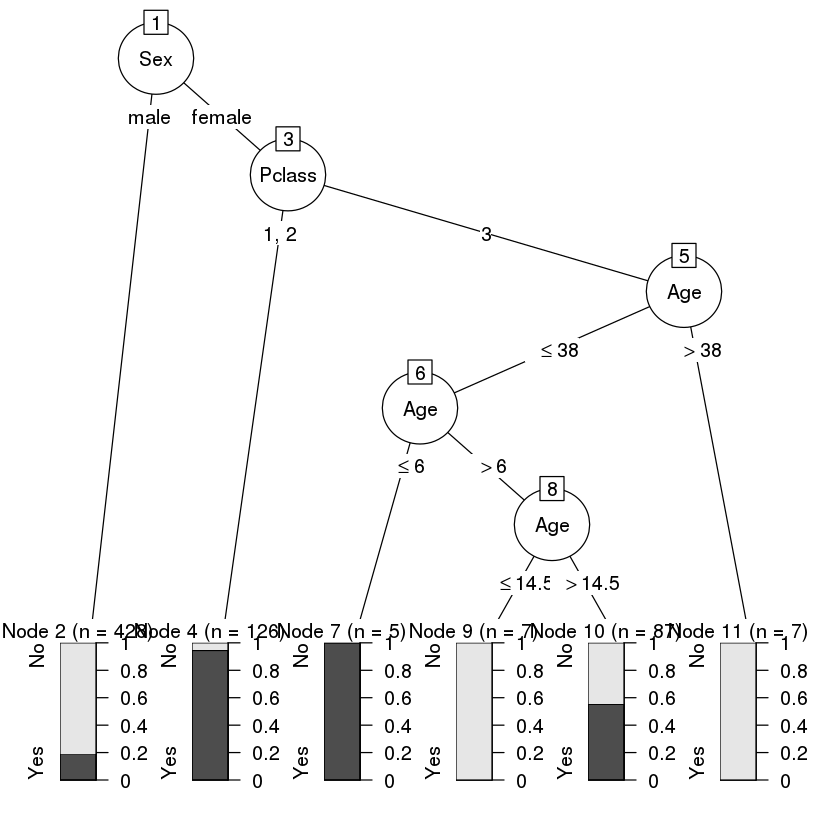

In [16]:
# MOSTRAR EL ARBOL OBTENIDO
plot(model_titanic)

estimated_ytest <- predict(model_titanic, xtest, type="class")
accuracy <- sum(ytest==estimated_ytest)/length(ytest)
error <- 1- accuracy
print(paste("La accuracy del modelo es: ", accuracy))
print(paste("El error del modelo es: ", error))

# Mirando las reglas del modelo
mod <- C50::C5.0(ytrain ~ ., data = xtrain, rules = TRUE)
summary(mod)
cat(mod$rules)

## 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?<a name="data6"></a>


Analizando nuestro gráfico de árbol, queda claro que independientemente de la clase del pasajero, si su sexo fuera "**Hombre**", su capacidad de sobrevivir era  más pequeña que de una mujer (probabilidad de los hombres como un todo alrededor de 20%).

Es importante resaltar que al elegir las variables, la variable **PClass** tiene más peso sobre las otras (**Age** y **FareBin**). Los pasajeros de la primera y segunda clase tiene un porcentaje más alto de sobrevivir que la tercera. Dicho, si la pasajera de la 3a clase tiene más que 38 años, posiblemente no sobrevivirá. 

## 7. Código<a name="data7"></a>

Como he optado por hacer directamente en un Jupyter notebook, todos las partes del código estan presentes en este documento, sin embargo, en el repositorio de Github también es posible encontrar todos los archivos utilizados durante la práctica.

## 8. Referencias<a name="refer"></a>

**[1] Stanczyk, U.; Jain, L. C. (2014)**. *Feature Selection for Data and Pattern Recognition*. Springer.

**[2] Sunil, R. (2016)**. *A Comprehensive Guide to Data Exploration*. Artículo en línea. https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/ Accedido en 02 de Enero de 2019.
